In [2]:
import numpy as np

In [24]:
import numpy as np

class Linear_Regression:
    def __init__(self, lr=0.01, n_iterations=10000):  # Changed lr to 0.01
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias  # Shape: (n_samples,)
            
            # Reshape (y_predicted - y) to (n_samples, 1) for correct dot product
            error = y_predicted - y.reshape(-1)  # Ensure error is 1D
            
            dw = (1 / n_samples) * np.dot(X.T, error)  # X.T @ error
            db = (1 / n_samples) * np.sum(error)

            self.weights = self.weights - self.lr * dw  # Fixed typo: weight -> weights
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

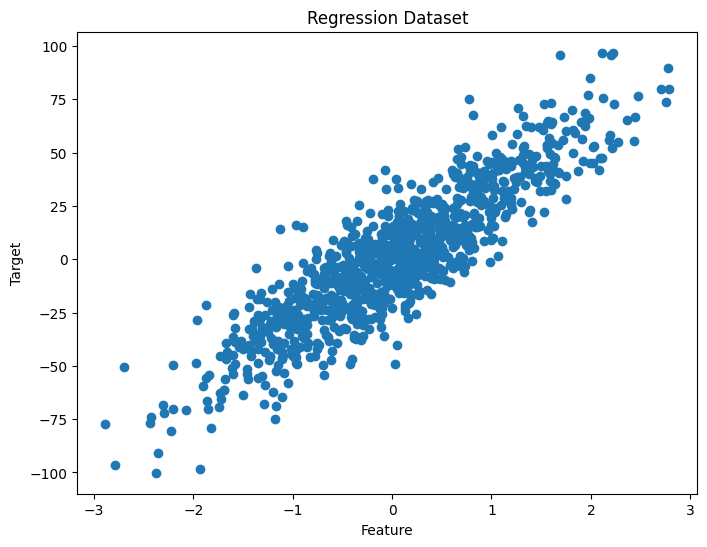

In [54]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=15, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y)  
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Regression Dataset")
plt.show()

In [56]:
reg = Linear_Regression()
reg.fit(X_train,y_train)

In [58]:
predictions = reg.predict(X_test)

In [60]:
def MSE(y_test,predictions):
    return np.mean((y_test - predictions)**2)

mse = MSE(y_test,predictions)
print(mse)

215.57617137087146


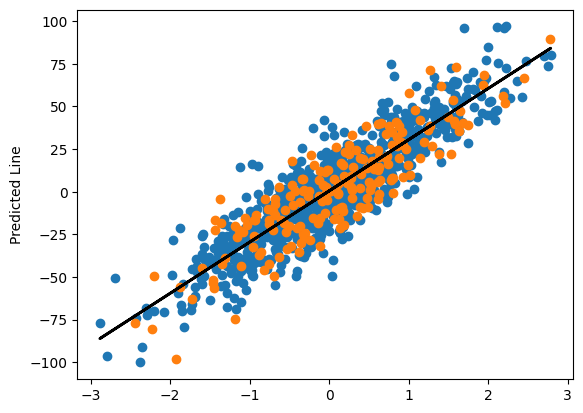

In [62]:
predicted_line =reg.predict(X)
plt.plot(X,predicted_line,color='black',linewidth=2)
m1=plt.scatter(X_train,y_train)
m2=plt.scatter(X_test,y_test)
plt.ylabel("Predicted Line")
plt.show()